# Plot the data as in the Sculptor paper

In [1]:
#import numpy
#numpy.version.version

#MAKE SURE YOU ARE USING NUMPY 1.22 AND NOT THE UPDATED ONE. OTHERWISE ASTROPY.IO WILL FAIL!!!!

In [2]:
#Import the standard modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

#from my_fun import tangent
#from my_fun2 import ellipse_rad




# Density distribution with equally spaced points in logR

In [200]:
#path = 'literature/'

from scipy.optimize import curve_fit
from scipy.special import gamma
from scipy.special import gammainc

def model_f(r_mod,a,b):
  return a*np.exp(-r_mod/b)


def exp_a(r_mod,a):
  return a*np.exp(-r_mod/0.6)

#These are the data from Battaglia+2022, if you don't have it, maybe remove it? Not sure these are public

#candid=Table.read('scl_battaglia.csv', format='ascii', delimiter=',')

# ra_cand=np.array(candid['RA_ICRS']) 
# dec_cand=np.array(candid['DE_ICRS'])
# prob_cand=np.array(candid['Pmemb'])
#rell_cand=12.33*np.array(candid['r_ell'])

# good_prob_ind=np.where( prob_cand>0.1 )
        
# ra=ra_cand[good_prob_ind]
# dec=dec_cand[good_prob_ind]
# prob=prob_cand[good_prob_ind]

#These are from Jaclyn
candid_j=Table.read('../Sculptor.GAIASOURCE.RUWE.VELS.PROB.fits', format='fits').to_pandas()
candid_j = candid_j[candid_j.PSAT > 0.4]

xi_cand_j=np.array(candid_j['xi']) 
eta_cand_j=np.array(candid_j['eta'])
rell_cand_j=np.array(candid_j['r_ell'])

#change the centre of your system
raref=15.039166666666665 
decref=-33.70916666666667

#to go in the projected coordinates
# xi,eta=tangent(raref,decref,ra,dec)

#change these according to your system
ecc=0.37 #1-b/a
a=12.33/60       #radius on the x-axis
b=(1-ecc)*a      #radius on the y-axis
PA=94

# rell_cand = np.sqrt( ellipse_rad( 0, 0, 90 - PA,  a, b, xi, eta ) )
# print(max(rell_cand),'max r_ell candidates')


#Penarrubia2008 model after the first apocentric passage
pena=Table.read('first_apo.csv', format='ascii', delimiter=',')
pox=np.array(pena['x']) 
poy_ex=np.array(pena['y'])

#change the 5.8 to your system
poy=np.power(10,poy_ex)
por=np.power(10,pox)*5.8  #in arcmin

#Penarrubia2008 model without tides 
pena2=Table.read( 'no_tides.csv', format='ascii', delimiter=',')
pox2=np.array(pena2['x']) 
poy_ex2=np.array(pena2['y'])

#change the 5.8 to your system, it is the core radius
poy2=np.power(10,poy_ex2)
por2=np.power(10,pox2)*5.8  #in arcmin

#core radius 5.8 \pm 1.6 arcmin
fs1=20
nbins=30
bins=np.logspace(start=np.log10(0.01), stop=np.log10(2 / a), num=nbins)

#counts, bins = np.histogram(rell_cand,bins=nbins)
x_bin=np.zeros(nbins-1)
dx_bin=np.zeros(nbins-1)
for i in range(nbins-1):
    
    x_bin[i]=(bins[i+1]+bins[i])/2.0
    dx_bin[i]=(bins[i+1]-bins[i])/2.0
    #print(x_bin[i],i,x_bin[i+1],bins[20])
    


#area_bin=np.zeros(nbins)
#darea_bin=np.zeros(nbins)
surf_dens=np.zeros(nbins-1)
surf_dens_err=np.zeros(nbins-1)
nstars=np.zeros(nbins-1)
#np.pi*a*b


# #change the half light radius, here is 12.33 arcmin
# for i in range(nbins-1):

#     area_big=np.pi*bins[i+1]*(1-ecc)*bins[i+1]
#     area_small=np.pi*bins[i]*(1-ecc)*bins[i]
#     area_diff=area_big-area_small  #area in unit of r_h^2 or arcmin^2
# #     if i==0:
# #         nstars_ind=np.where( (rell_cand<=bins[i+1]) & (rell_cand>=bins[i]) )
# #     else:
# #         nstars_ind=np.where( (rell_cand<=bins[i+1]) & (rell_cand>bins[i]) )
        
#     nstars_ind_n=np.asarray(nstars_ind)
#     nstars[i]=float(len(nstars_ind_n[0]))
#     #print(nstars_ind_n)
#     #print( np.float(len(nstars_ind_n[0])) )
    
#     #surf_dens[i]= nstars[i]/(area_diff) #in number of stars/arcmin^2
#     #surf_dens_err[i]= np.sqrt(nstars[i])/(area_diff)
#     surf_dens[i]= nstars[i]/(area_diff*12.33*12.33) #in number of stars/arcmin^2
#     surf_dens_err[i]= np.sqrt(nstars[i])/(area_diff*12.33*12.33)
    
x_bin_j=np.zeros(nbins-1)
dx_bin_j=np.zeros(nbins-1)
for i in range(nbins-1):
    
    x_bin_j[i]=(bins[i+1]+bins[i])/2.0
    dx_bin_j[i]=(bins[i+1]-bins[i])/2.0
    #print(x_bin[i],i,x_bin[i+1],bins[20])
    


#area_bin=np.zeros(nbins)
#darea_bin=np.zeros(nbins)
surf_dens_j=np.zeros(nbins-1)
surf_dens_err_j=np.zeros(nbins-1)
nstars_j=np.zeros(nbins-1)
#np.pi*a*b

for i in range(nbins-1):

    area_big_j=np.pi*bins[i+1]*(1-ecc)*bins[i+1]
    area_small_j=np.pi*bins[i]*(1-ecc)*bins[i]
    area_diff_j=area_big_j-area_small_j  #area in unit of r_h^2 or arcmin^2
    if i==0:
        nstars_ind_j=np.where( (rell_cand_j<=bins[i+1]) & (rell_cand_j>=bins[i]) )
    else:
        nstars_ind_j=np.where( (rell_cand_j<=bins[i+1]) & (rell_cand_j>bins[i]) )
        
    nstars_ind_n_j=np.asarray(nstars_ind_j)
    nstars_j[i]=float(len(nstars_ind_n_j[0]))
    
    surf_dens_j[i]= nstars_j[i]/(area_diff_j*12.33*12.33) #in number of stars/arcmin^2
    surf_dens_err_j[i]= np.sqrt(nstars_j[i])/(area_diff_j*12.33*12.33)

popt_j, pcov_j = curve_fit(exp_a, x_bin[(x_bin*12.33>1) & (x_bin*12.33<25)], surf_dens_j[(x_bin*12.33>1) & (x_bin*12.33<25)])
a_opt_j= popt_j
#x_model = np.linspace(0, 10, 1000) #if in r_h
x_model_j =np.logspace(start=np.log10(0.01), stop=np.log10(20), num=1000)
#x_model = np.linspace(0, 150, 10000) #if in arcmin
y_model_j = exp_a(x_model_j, a_opt_j) 



#Sculptor jaclyn, Penarrubia, inner exponential



In [201]:
surf_dens_j

array([0.00000000e+00, 3.40510385e+01, 6.35576169e+01, 5.27256970e+01,
       2.46036523e+01, 1.02052656e+01, 1.90485338e+01, 3.35795764e+01,
       2.45794565e+01, 2.52331929e+01, 2.28357613e+01, 2.36799201e+01,
       2.28364146e+01, 1.94792012e+01, 1.91061421e+01, 1.87183106e+01,
       1.43783122e+01, 1.13497850e+01, 9.29440121e+00, 5.94231500e+00,
       3.20919318e+00, 1.66734370e+00, 7.97251709e-01, 4.11369564e-01,
       2.03269368e-01, 7.13322314e-02, 1.31944946e-02, 4.47782702e-04,
       9.28671347e-05])

In [202]:

# inner_exp_int=np.interp(x_bin, x_model,y_model, left=None, right=None, period=None)
inner_exp_int_j=np.interp(x_bin, x_model_j,y_model_j, left=None, right=None, period=None)
#outer_exp_int=np.interp(x_bin, x_model,y_model2, left=None, right=None, period=None)


def gamma_m(x,y):
    s=len(x)
    dlogy=np.zeros(s-1)
    dlogx=np.zeros(s-1)
    gamma=np.zeros(s-1)
    x_new=np.zeros(s-1)

    for i in range(s-1):
        dlogy[i]=np.log10(y[i+1]) - np.log10(y[i])
        dlogx[i]=np.log10(x[i+1]) - np.log10(x[i])
        x_new[i]=(x[i+1]+x[i])/2.0
        gamma[i]=dlogy[i]/dlogx[i]
        
    return x_new,gamma#,dlogx,dlogy

def gamma_obs(x,y,dy):
    s=len(x)
    dlogy=np.zeros(s-1)
    dlogx=np.zeros(s-1)
    gamma=np.zeros(s-1)
    x_new=np.zeros(s-1)
    x_new_err=np.zeros(s-1)
    gamma_err=np.zeros(s-1)
    for i in range(s-1):
        dlogy[i]=np.log10(y[i+1]) - np.log10(y[i])
        dlogx[i]=np.log10(x[i+1]) - np.log10(x[i])
        x_new[i]=(x[i+1]+x[i])/2.0
        x_new_err[i]=(x[i+1]-x[i])/2.0
        gamma[i]=dlogy[i]/dlogx[i]
        gamma_err[i]= np.sqrt( np.log10(dy[i+1])**2 + np.log10(dy[i])**2  )/dlogx[i]
        
    return x_new,gamma,x_new_err,gamma_err

    


#x_obs,gamma_obs,x_obs_err,gamma_obs_err=gamma_obs(x_bin, surf_dens, surf_dens_err)
#x_obs,gamma_obs=gamma_m(x_bin, surf_dens)
x_obs_j,gamma_obs_j=gamma_m(x_bin_j, surf_dens_j)

#x_inexp,gamma_inexp=gamma_m(x_model, y_model)
x_inexp_j,gamma_inexp_j=gamma_m(x_model_j, y_model_j)


x_pen,gamma_pen=gamma_m(por,poy)
x_pen2,gamma_pen2=gamma_m(por2,poy2)



/var/folders/zf/h7t3p5rj5cv9858z697g6fq40000gn/T/ipykernel_20548/2291880249.py:14: RuntimeWarning: divide by zero encountered in log10
  dlogy[i]=np.log10(y[i+1]) - np.log10(y[i])
/var/folders/zf/h7t3p5rj5cv9858z697g6fq40000gn/T/ipykernel_20548/2291880249.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  gamma[i]=dlogy[i]/dlogx[i]


In [203]:
gamma_obs_j

array([         inf,   2.63035682,  -0.78749704,  -3.21250296,
        -3.70892693,   2.63035682,   2.3894494 ,  -1.3150262 ,
         0.11063384,  -0.42076737,   0.15299331,  -0.15287274,
        -0.67018082,  -0.08150209,  -0.08643421,  -1.11176737,
        -0.99687768,  -0.84204706,  -1.88530633,  -2.59660909,
        -2.75975535,  -3.10969951,  -2.78879764,  -2.97121758,
        -4.41359932,  -7.11256584, -14.25948024,  -6.63035682])

/var/folders/zf/h7t3p5rj5cv9858z697g6fq40000gn/T/ipykernel_20548/2549489872.py:63: RuntimeWarning: divide by zero encountered in log10
  ax3.plot(x_bin_j*12.33, np.log10(surf_dens_j)-np.log10(inner_exp_int_j) , color='blue', marker='o',markersize=30,linestyle='-', label='Sculptor J23 - Exponential') #inner exponential


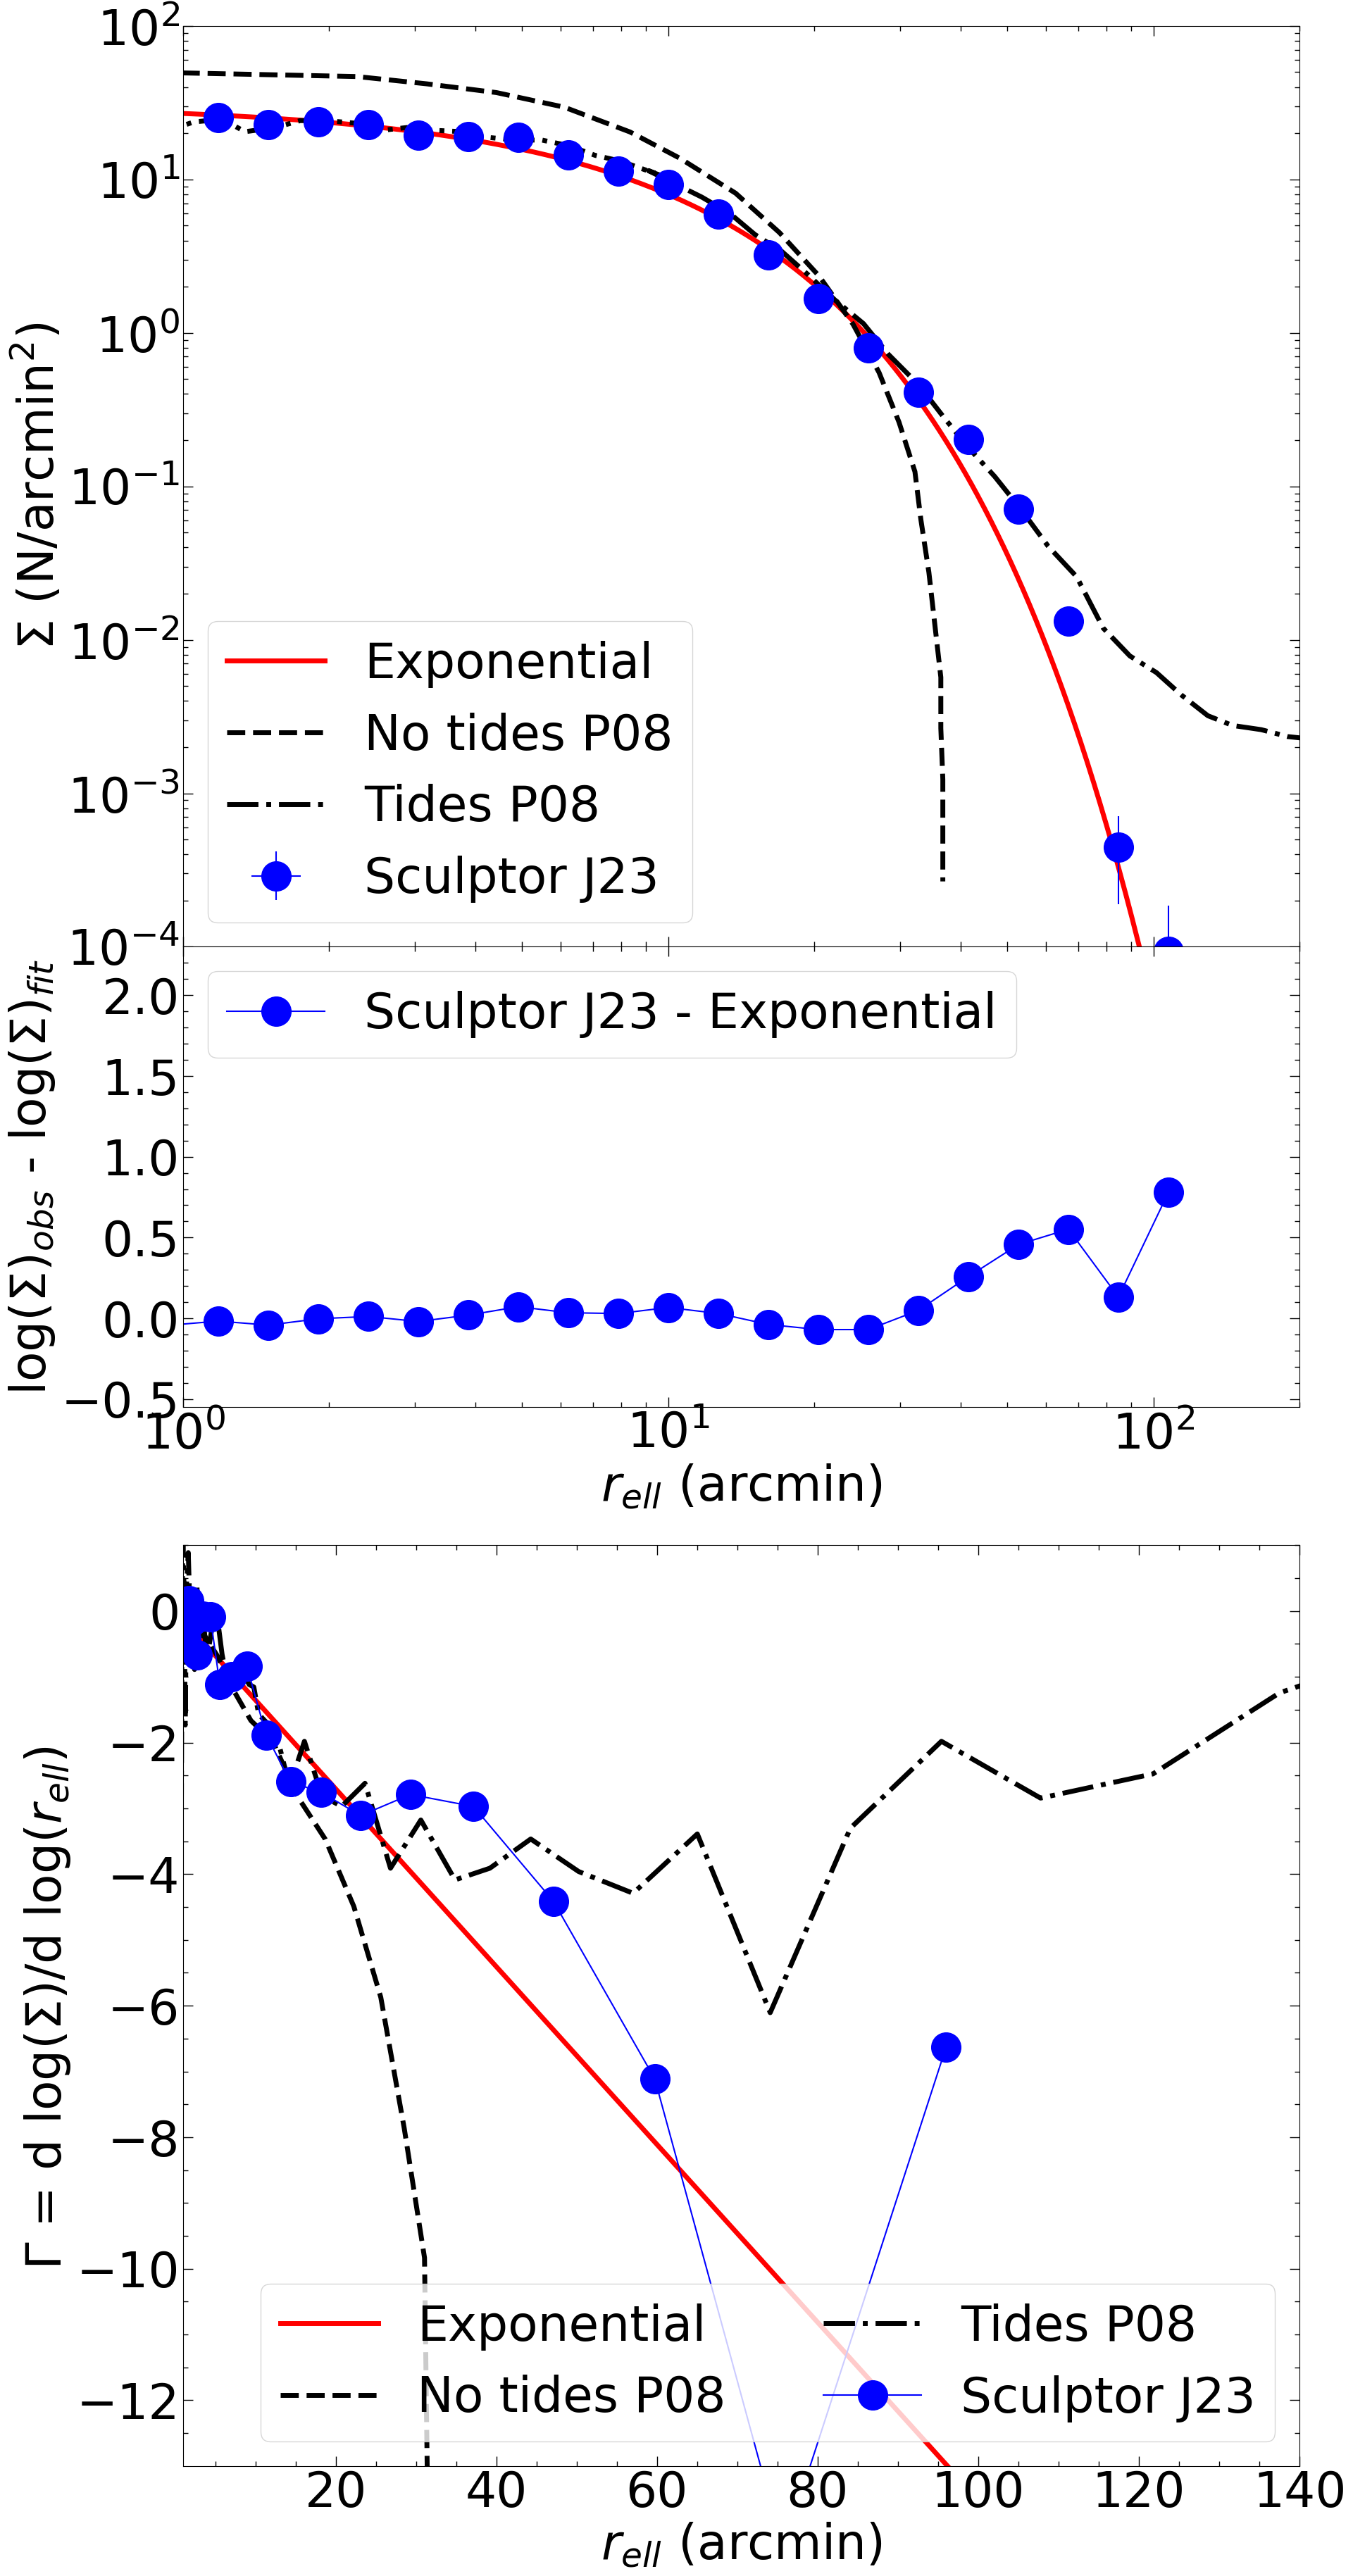

In [204]:
from matplotlib import gridspec

'''
import pandas as pd
Sname = 'Sample0_'
#fcat =Sname+'candidates.csv'
fndens = Sname+'density_y22.csv'
dprof = pd.read_csv(fndens)
x_for_y22,gamma_for_y22=gamma_m(dprof['xr']*60, dprof['counts']/dprof['area']/3600)
'''


fs1=50
fig1 = plt.figure(figsize=(45,45))
gs  = gridspec.GridSpec(ncols=3, nrows=5, width_ratios=[1. , 0.2 ,1.],height_ratios=[1. , 0. ,0.5 , 0.15, 1 ])


ax1 = fig1.add_subplot(gs[0,0])


ax1.plot(x_model_j*12.33, y_model_j, color='r', linewidth=5,label='Exponential') #inner exponential

mul=50
mul2=150
#*1.5
ax1.plot(por2*1.5,poy2*mul, color='black', marker='',markersize=25,linestyle='dashed' , linewidth=5,label='No tides P08')
ax1.plot(por*1.5,poy*mul, color='black', marker='',markersize=25,linestyle='dashdot' , linewidth=5,label='Tides P08')

#ax1.plot(bin_alan*12.33,surf_alan_interp, color='red', marker='o',markersize=25,fillstyle='none',linestyle='' ,label='Sculptor MV20')
#ax1.plot(x_bin_alan*12.33, surf_dens_alan, color='red', marker='o',markersize=40,fillstyle='none',linestyle='' ,label='Sculptor MV20')


# ax1.errorbar(x_bin*12.33, surf_dens, yerr=surf_dens_err,xerr=dx_bin ,color='blue', marker='.',markersize=80,linestyle='',label='Sculptor B22')
ax1.errorbar(x_bin_j*12.33, surf_dens_j, yerr=surf_dens_err_j,xerr=dx_bin ,color='blue', marker='.',markersize=60,linestyle='',label='Sculptor J23')

ax1.legend(fontsize=fs1,loc="lower left")
ax1.set_yscale('log', nonpositive='clip')
ax1.set_xscale('log', nonpositive='clip')
#plt.xlim(0,10.5) #if in r_h
ax1.set_xlim(1,200) #if in arcmin
ax1.set_ylim(0.0001,100)
plt.xticks(fontsize=fs1) 
plt.yticks(fontsize=fs1)

#plt.xlabel( '$r_{ell}$ ($r_h$)',fontsize=fs1)
#plt.xlabel( '$r_{ell}$ (arcmin)',fontsize=fs1)
plt.ylabel('$\Sigma$ (N/arcmin$^2$)',fontsize=fs1)
ax1.minorticks_on()
ax1.set_xticklabels([]) 
#ax1.set_xticks(ticks=[1, 10 ,100])
plt.tick_params( axis='both', which='major', length=10,width=1, direction='in', top=True, bottom=True,right=True, left=True)
plt.tick_params( axis='both', which='minor', length=5,width=1, direction='in', top=True, bottom=True,right=True, left=True)







ax3 = fig1.add_subplot(gs[2,0])

#ax3.plot(x_bin*12.33, np.log10(surf_dens)-np.log10(inner_exp_int) , color='blue', marker='o',markersize=40,linestyle='-', label='Sculptor B22 - Exponential') #inner exponential
ax3.plot(x_bin_j*12.33, np.log10(surf_dens_j)-np.log10(inner_exp_int_j) , color='blue', marker='o',markersize=30,linestyle='-', label='Sculptor J23 - Exponential') #inner exponential

#plt.yscale('log', nonpositive='clip')
plt.xscale('log', nonpositive='clip')
plt.xlim(1,200) #if in arcmin
plt.ylim(-0.55,2.3)
plt.xticks(fontsize=fs1) 
plt.yticks(fontsize=fs1)
plt.xlabel( '$r_{ell}$ (arcmin)',fontsize=fs1)
plt.ylabel('log($\Sigma$)$_{obs}$ - log($\Sigma$)$_{fit}$',fontsize=fs1)
plt.minorticks_on()
plt.tick_params( axis='both', which='major', length=10,width=1, direction='in', top=True, bottom=True,right=True)
plt.tick_params( axis='both', which='minor', length=5,width=1, direction='in', top=True, bottom=True,right=True)
plt.legend(fontsize=fs1,loc="upper left")
plt.subplots_adjust(wspace=0, hspace=0)




ax5 = fig1.add_subplot(gs[4,0])


#lin_grid=np.linspace(0.5, 10.5, 20) #linear grid in r_h
#gamma_obs_lin=np.interp(lin_grid, x_obs,gamma_obs, left=None, right=None, period=None)

#lin_grid_al=np.linspace(0.5, 6.5, 14) #linear grid in r_h
#gamma_al_lin=np.interp(lin_grid_al, x_al,gamma_al, left=None, right=None, period=None)

ax5.plot(x_inexp_j*12.33,gamma_inexp_j, color='r', linewidth=5, label='Exponential') #inner exponential
#*1.5
ax5.plot(x_pen2*1.5,gamma_pen2, color='black', marker='',markersize=5,linestyle='dashed', linewidth=5,label='No tides P08') 
ax5.plot(x_pen*1.5,gamma_pen, color='black', marker='',markersize=5,linestyle='dashdot', linewidth=5,label='Tides P08')


#ax5.plot(x_obs[x_obs*12.33<1]*12.33,gamma_obs[x_obs*12.33<1], color='b', marker='o',markersize=1,linestyle='-') 
#ax5.plot(x_obs[x_obs*12.33>1]*12.33,gamma_obs[x_obs*12.33>1], color='b', marker='o',markersize=40,linestyle='-',label='Sculptor B22') 

#ax5.plot(x_obs_j[x_obs_j*12.33<1]*12.33,gamma_obs_j[x_obs_j*12.33<1], color='r', marker='o',markersize=1,linestyle='-') 
ax5.plot(x_obs_j[x_obs_j*12.33>1]*12.33,gamma_obs_j[x_obs_j*12.33>1], color='b', marker='o',markersize=30,linestyle='-',label='Sculptor J23') 


#plt.xlim(0,10.5) #if in r_h
plt.xlim(1,140) #if in arcmin
plt.ylim(-13,1)
plt.xticks(fontsize=fs1) 
plt.yticks(fontsize=fs1)

#plt.xlabel( '$r_{ell}$ ($r_h$)',fontsize=fs1)
plt.xlabel( '$r_{ell}$ (arcmin)',fontsize=fs1)
plt.ylabel('$\Gamma$ = d log($\Sigma$)/d log($r_{ell}$) ',fontsize=fs1)
plt.legend(ncol=2,fontsize=fs1,loc="lower right")

plt.minorticks_on()
plt.tick_params( axis='both', which='major', length=10,width=1, direction='in', top=True, bottom=True,right=True)
plt.tick_params( axis='both', which='minor', length=5,width=1, direction='in', top=True, bottom=True,right=True)
#print(dlogy)
#print(surf_dens)


plt.tick_params( axis='both', which='major', length=10,width=1, direction='in', top=True, bottom=True,right=True)
plt.tick_params( axis='both', which='minor', length=5,width=1, direction='in', top=True, bottom=True,right=True)



ax1.set_xticks(ticks=[1, 10 ,100])

plt.savefig('surface.pdf',bbox_inches='tight')
#print(dlogy)
#print(surf_dens)


#remove the models P08 for Fornax


In [205]:
x_obs_j * 12.33

array([ 0.15852684,  0.20097629,  0.25479261,  0.32301957,  0.40951596,
        0.51917389,  0.65819541,  0.83444334,  1.05788598,  1.34116085,
        1.7002895 ,  2.15558363,  2.73279392,  3.4645664 ,  4.39228887,
        5.56843175,  7.05951567,  8.94987383, 11.34642165, 14.38470383,
       18.23656044, 23.11984595, 29.31075072, 37.1594218 , 47.10976671,
       59.72456007, 75.71727319, 95.99242677])

In [206]:
disp_v=9.2 #kms
tperi=0.41 #Gyr
coe=0.55

break_r= 0.55*tperi* 31556952.0*1e9*disp_v*3.2407792896664e-17 #in kpc

print(break_r,'kpc')


dist_umi=86.0 #kpc
rh_umi=12.33 #arcmin

break_arc= np.rad2deg( np.arctan(break_r/dist_umi) )*60.0
print(break_arc,'arcmin')
print(break_arc/12.33,'rh')

2.1216750906309345 kpc
84.79421474372823 arcmin
6.877065267131243 rh


In [217]:
import pandas as pd
df_s23 = pd.DataFrame()
df_s23["rell"]  = x_bin_j*12.33
df_s23["dens"] = surf_dens_j
df_s23["x_gamma"] = np.concatenate([x_obs_j * 12.33, [np.nan]])
df_s23["gamma"] = np.concatenate([gamma_obs_j, [np.nan]])

In [218]:
df_s23.to_csv("s23_sculptor.csv")